In [1]:
import pandas as pd

In [2]:
bird_data = pd.read_csv("bird_tracking.csv")

In [3]:
bird_data.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
ix = bird_data.bird_name == "Eric"

In [7]:
x, y = bird_data.longitude[ix], bird_data.latitude[ix]

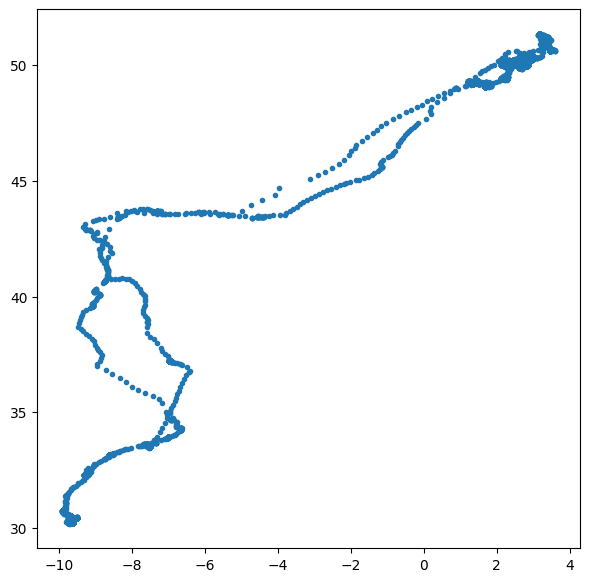

In [8]:
plt.figure(figsize=(7,7))
plt.plot(x, y, ".")

In [9]:
bird_names = pd.unique(bird_data.bird_name)

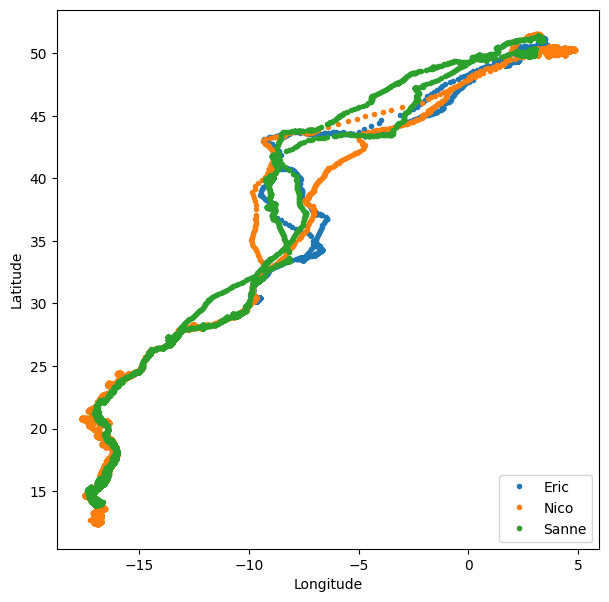

In [11]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = ix = bird_data.bird_name == bird_name
    x, y = bird_data.longitude[ix], bird_data.latitude[ix]
    plt.plot(x, y, ".", label = bird_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

Text(0, 0.5, 'Frequency')

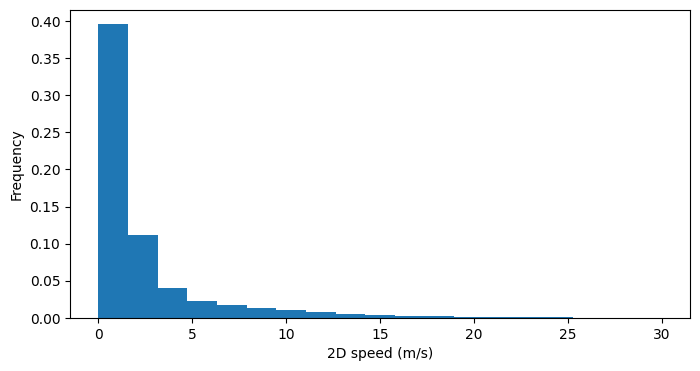

In [22]:
plt.figure(figsize=(8,4))
speed = bird_data.speed_2d[bird_data.bird_name == "Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30,  20), density= True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")

In [23]:
import datetime

In [24]:
timestamps = []
for k in range(len(bird_data)):
    date_str = bird_data.date_time[k]
    tmp = datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")
    timestamps.append(tmp)

In [26]:
bird_data["timestamp"] = pd.Series(timestamps, index=bird_data.index)

In [27]:
times = bird_data.timestamp[bird_data.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

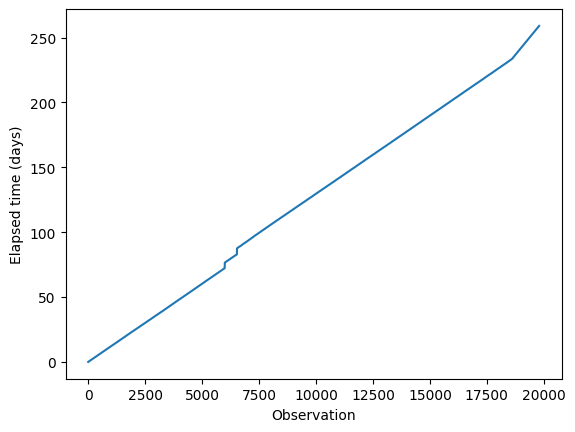

In [29]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");